In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Salary_Data.csv')

In [60]:
data

,YearsExperience,Salary,YearsExperience_sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [ ]:
data.info()

Text(0, 0.5, 'YearsExperience')

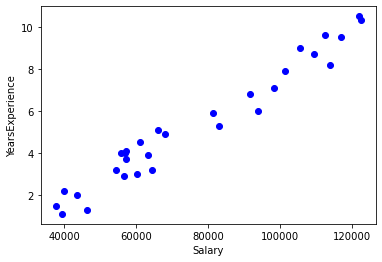

In [6]:
plt.plot(data.Salary,data.YearsExperience,'bo')
plt.xlabel('Salary')
plt.ylabel('YearsExperience')

In [7]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Salary', ylabel='Density'>

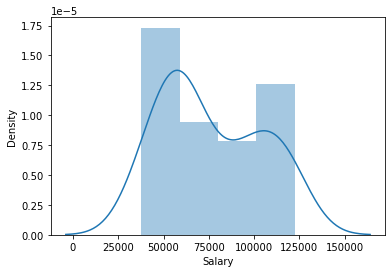

In [11]:
sns.distplot(data['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

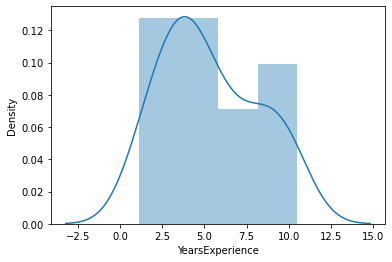

In [12]:
sns.distplot(data['YearsExperience'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

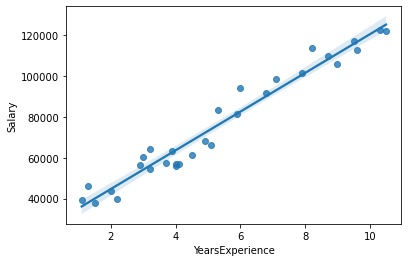

In [13]:
sns.regplot(y='Salary',x='YearsExperience',data=data)

In [ ]:
#1. linear model

In [14]:
import statsmodels.formula.api as smf
model1=smf.ols('Salary~YearsExperience',data=data).fit()

In [15]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        19:32:59   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model1.resid.head() #errors for individual observation

0    3155.841248
1    8127.848783
2   -2236.143681
3   -1167.124842
4   -6691.117306
dtype: float64

In [18]:
pred1=model1.predict(data.YearsExperience)
pred1.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

In [1]:
#overall error -  Target variable

In [20]:
rmse_lin=np.sqrt(np.mean((np.array(data['Salary'])-np.array(pred1))**2))
rmse_lin

5592.043608760662

In [22]:
model1.params
model1.pvalues
model1.tvalues
model1.rsquared

0.9569566641435086

In [2]:
#   Experiment 
#2. Log Transformation - ~np.log is addition for independent variable

# To achive better accracy

In [24]:
model2=smf.ols('Salary~np.log(YearsExperience)',data=data).fit()

In [25]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           3.25e-13
Time:                        19:35:54   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model2.rsquared

0.8538888828756969

In [27]:
pred2=model2.predict(data.YearsExperience)
pred2.head()

0    18795.848339
1    25575.235192
2    31382.551905
3    43057.262306
4    46925.138875
dtype: float64

In [28]:
rmse_log = np.sqrt(np.mean((np.array(data["Salary"])-np.array(pred2))**2))

In [29]:
rmse_log

10302.893706228308

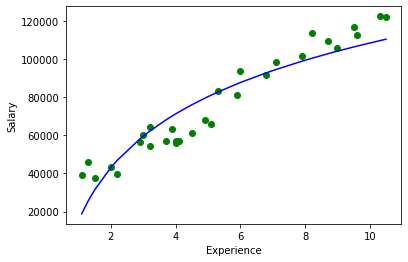

In [30]:
plt.scatter(x=data["YearsExperience"],y=data["Salary"],color="green")
plt.plot(data["YearsExperience"],pred2,color="blue")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

In [3]:
# 3. Exponential Transformation ~np.log is addition for target variable

In [32]:
model3=smf.ols("np.log(Salary)~YearsExperience",data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           7.03e-18
Time:                        19:35:55   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
pred3a=model3.predict(data.YearsExperience)
pred3a.head()

0    10.645400
1    10.670491
2    10.695581
3    10.758308
4    10.783398
dtype: float64

In [34]:
pred3=np.exp(pred3a) #convert it back

In [35]:
pred3.head()

0    41998.957468
1    43066.066794
2    44160.289228
3    47019.029189
4    48213.688474
dtype: float64

In [36]:
rmse_exp = np.sqrt(np.mean((np.array(data["Salary"])-np.array(pred3))**2))

In [37]:
rmse_exp

7213.235076620129

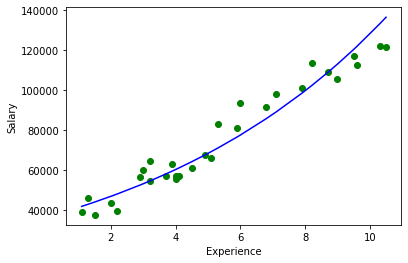

In [38]:
plt.scatter(x=data["YearsExperience"],y=data["Salary"],color="green")
plt.plot(data["YearsExperience"],pred3,color="blue")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

In [39]:
# 4. Quadratic Model Combination of exponential transformation and Quadratic transformation

In [40]:
data["YearsExperience_sq"] = data["YearsExperience"]*data["YearsExperience"]
#square

In [41]:
model4=smf.ols("np.log(Salary)~YearsExperience+YearsExperience_sq",data=data).fit()

In [42]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           3.95e-18
Time:                        19:35:57   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience        0.2024      0.027      7.601      0.000       0.148       0.257
YearsExperience_sq    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
pred4a = model4.predict(data)

In [44]:
pred4=np.exp(pred4a) #convert it back

In [45]:
rmse_quad = np.sqrt(np.mean((np.array(data["Salary"])-np.array(pred4))**2))

In [46]:
rmse_quad

5391.081582693624

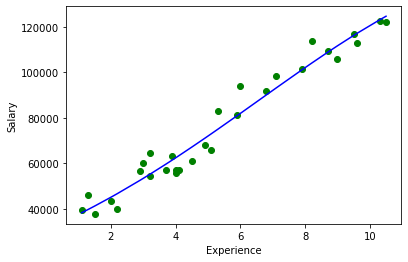

In [47]:
plt.scatter(x=data["YearsExperience"],y=data["Salary"],color="green")
plt.plot(data["YearsExperience"],pred4,color="blue")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

In [48]:
data1 = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
         "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
         "Rsquare":pd.Series([model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared])}
table=pd.DataFrame(data1)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,5592.043609,0.956957
1,rmse_log,10302.893706,0.853889
2,rmse_exp,7213.235077,0.931967
3,rmse_quad,5391.081583,0.948611


In [51]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [52]:
plt.style.use('classic')

In [5]:
# Model Validation by plotting the errors

Text(0, 0.5, 'Standarized Residual')

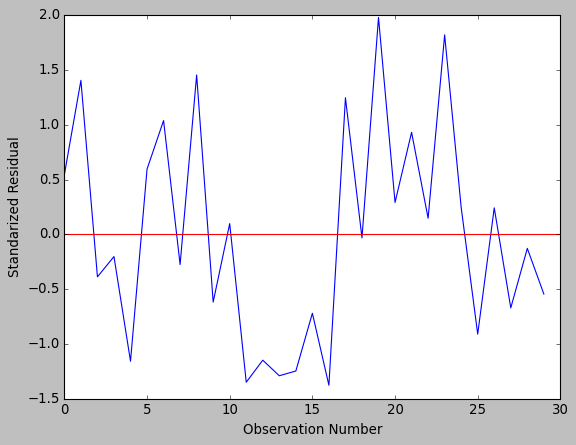

In [54]:
plt.plot(np.arange(30),model1.resid_pearson)
plt.axhline(y=0,color="red")
plt.xlabel("Observation Number")
plt.ylabel("Standarized Residual")

Text(0, 0.5, 'Standarized Residual')

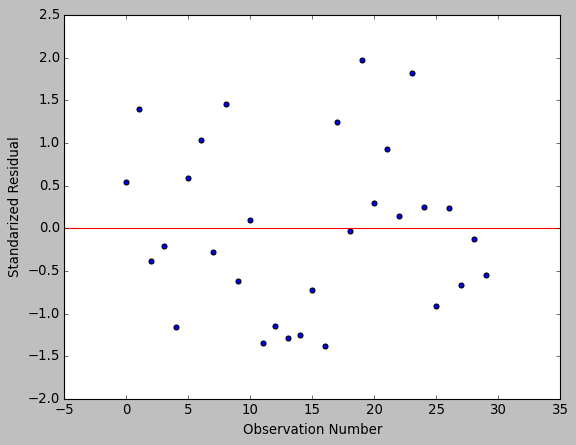

In [55]:
plt.scatter(np.arange(30),model1.resid_pearson)
plt.axhline(y=0,color="red")
plt.xlabel("Observation Number")
plt.ylabel("Standarized Residual")

# WE CAN USE THE QUADRATIC MODEL AS IT HAS THE LEAST RMSC VALE AND 94.8% ACCURACY BY R VALUE


# PREDICTION MODEL

In [56]:
newdata=pd.Series([0.5,12,15,20,25,30,40])

In [57]:
datapred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [58]:
model1.predict(datapred)

0     30517.181359
1    139191.748056
2    167541.635020
3    214791.446628
4    262041.258235
5    309291.069842
6    403790.693057
dtype: float64